<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 20 **
** ┗ Prediction of order quantity for orders for the next year **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉SESSION 1 -「Analysis of Order Trends」
* 🥈SESSION 2 -「Time Serial Disassembly」
* 🥇SESSION 3 -「For Expectation of Time Series Use of Arima」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/20_Forecasting Distribution Volume for Next Year')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/20_Forecasting Distribution Volume for Next Year'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🎫 (inventory manager)

``
Company A develops plans for ordering every year and manages inventory through starters.Demand forecasts play a very important role because of pre -ordering.
If you order excessively, the cost of warehouse will increase, and if you predict less, you will not be able to respond to the production schedule.Therefore, using past order data
We want to create a demand prediction model and use it for ordering plans.

``


> ** Looking at the data **

* Inventory order data
* M3: Material orders


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_excel("chapter20_order.xlsx")
df = pd.DataFrame(df)
df.head(10)

,Date,M3
0,2012-01-01,27
1,2012-02-01,37
2,2012-03-01,8
3,2012-04-01,9
4,2012-05-01,11
5,2012-06-01,7
6,2012-07-01,5
7,2012-08-01,8
8,2012-09-01,23
9,2012-10-01,4



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Increasing warehouse costs due to starting stocks, disorders of response to production schedules
``

> ** Expected effect **

``
▶ Reduction of warehouse costs, flexible production schedules
``

> ** Solution **

``
▶ Inventory management of demand prediction model
▶ Session 1 🥉
-Data pretreatment and order trend (Trend) analysis
▶ Session 2 🥈
-I understand time series data decomposition
▶ Session 3 🥇
-SESONAL ARIMA Model Use of Materials and Evaluation
``

> ** Performance measurement **

``
▶ Measurement of reduced costs through inventory management
``

> ** Public application **

``
▶ Forecasting and utilizing the quantity quantity through modeling
``

> ** Main code preview **

``
▶ Session 1 → Plt.plot
▶ Session 2 → Seasonal_decompose
▶ Session 3 → ITERTOOLS, sm.tsa.stateSpace.sarimax ()
``


## ** 🥉Session 1 **
** ┗ Order trend analysis **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 82 ROW, 2 COL
print('df', df.shape)

df (82, 2)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    82 non-null     datetime64[ns]
 1   M3      82 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

Date    0
M3      0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,Date,M3
count,82,82.000000
mean,2015-05-17 10:32:11.707316992,82.134146
min,2012-01-01 00:00:00,2.000000
25%,2013-09-08 12:00:00,26.250000
50%,2015-05-16 12:00:00,53.500000
75%,2017-01-24 06:00:00,131.000000
max,2018-10-01 00:00:00,393.000000
std,NaN,79.807138


### · Order trend analysis
---


In [ ]:
df.head(5)

,Date,M3
0,2012-01-01,27
1,2012-02-01,37
2,2012-03-01,8
3,2012-04-01,9
4,2012-05-01,11


In [ ]:
df['Date'].min(), df['Date'].max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2018-10-01 00:00:00'))

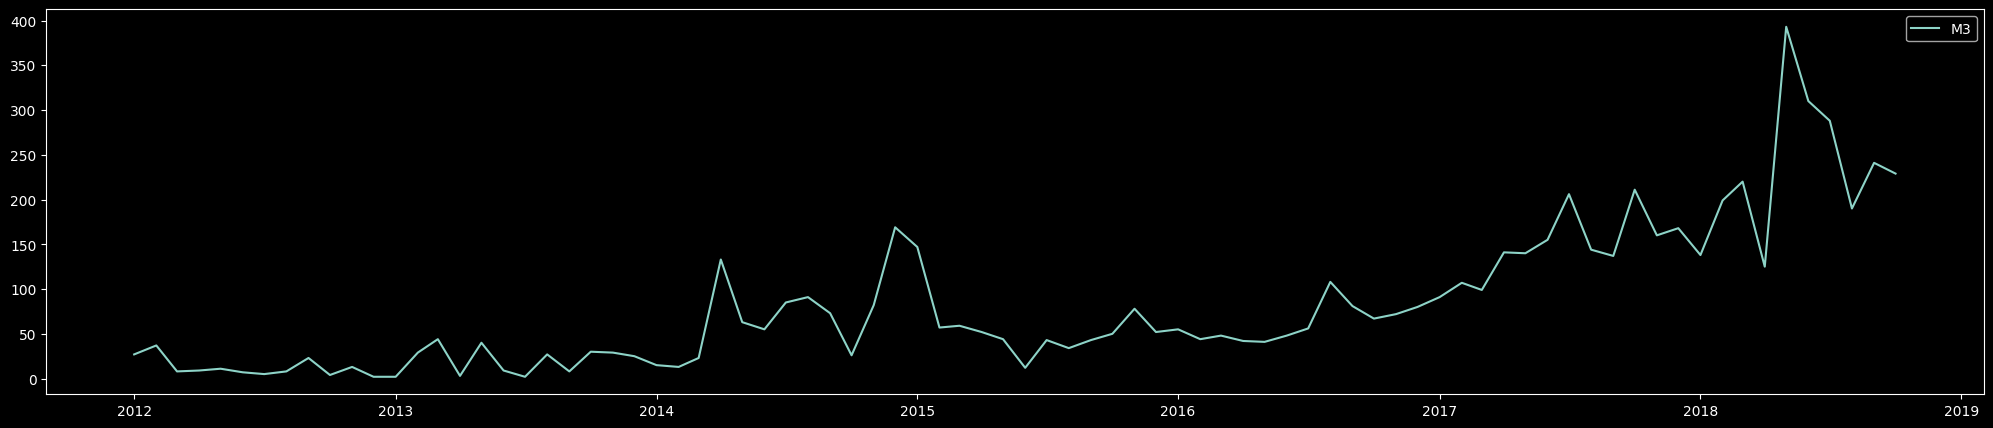

In [ ]:
# ▶ All period plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date'], df['M3'], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 5)

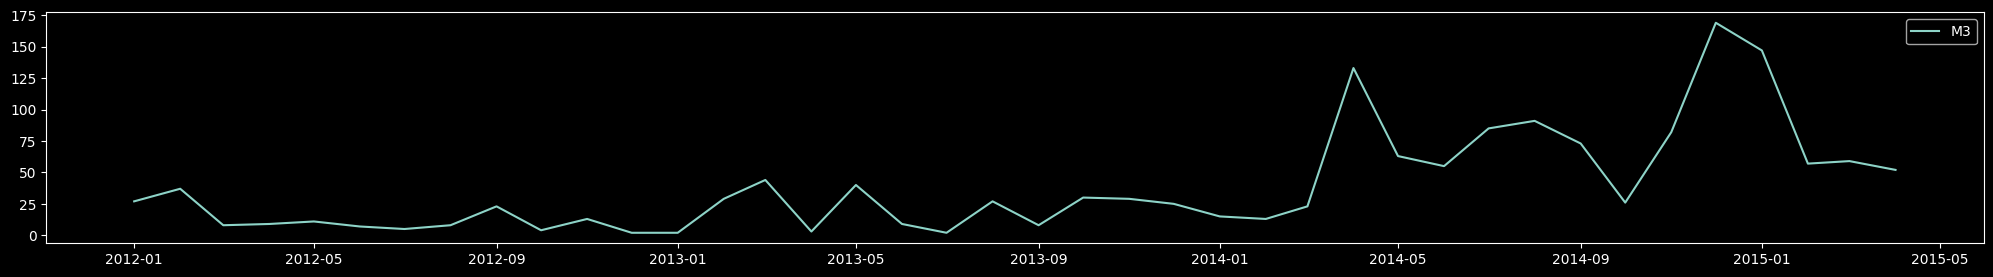

In [ ]:
# ▶ Some period of plotting [0:40]
plt.plot(df['Date'][0:40], df['M3'][0:40], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 3)

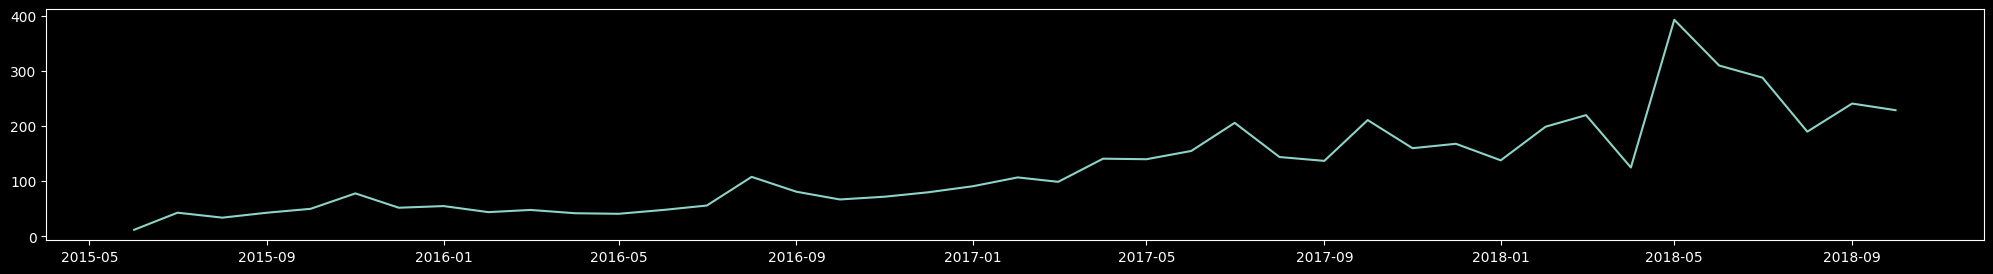

In [ ]:
# ▶ Some period of plotting [41:]
plt.plot(df['Date'][41:], df['M3'][41:], label='M3');
plt.gcf().set_size_inches(25, 3)

In [ ]:
df.head(5)

,Date,M3
0,2012-01-01,27
1,2012-02-01,37
2,2012-03-01,8
3,2012-04-01,9
4,2012-05-01,11


In [ ]:
# ▶ Monthly comparison
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head(5)

,Date,M3,year,month
0,2012-01-01,27,2012,1
1,2012-02-01,37,2012,2
2,2012-03-01,8,2012,3
3,2012-04-01,9,2012,4
4,2012-05-01,11,2012,5


In [ ]:
# ▶ Comparison of monthly material order volume by year
df_pivot = pd.pivot_table(df,                  # Pivot data frame
                      index = 'year',          # Passes in the line
                      columns = 'month',       # Heat to enter the column position
                      values = 'M3')           # Open to be used as data

df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,27.0,37.0,8.0,9.0,11.0,7.0,5.0,8.0,23.0,4.0,13.0,2.0
2013,2.0,29.0,44.0,3.0,40.0,9.0,2.0,27.0,8.0,30.0,29.0,25.0
2014,15.0,13.0,23.0,133.0,63.0,55.0,85.0,91.0,73.0,26.0,82.0,169.0
2015,147.0,57.0,59.0,52.0,44.0,12.0,43.0,34.0,43.0,50.0,78.0,52.0
2016,55.0,44.0,48.0,42.0,41.0,48.0,56.0,108.0,81.0,67.0,72.0,80.0
2017,91.0,107.0,99.0,141.0,140.0,155.0,206.0,144.0,137.0,211.0,160.0,168.0
2018,138.0,199.0,220.0,125.0,393.0,310.0,288.0,190.0,241.0,229.0,NaN,NaN


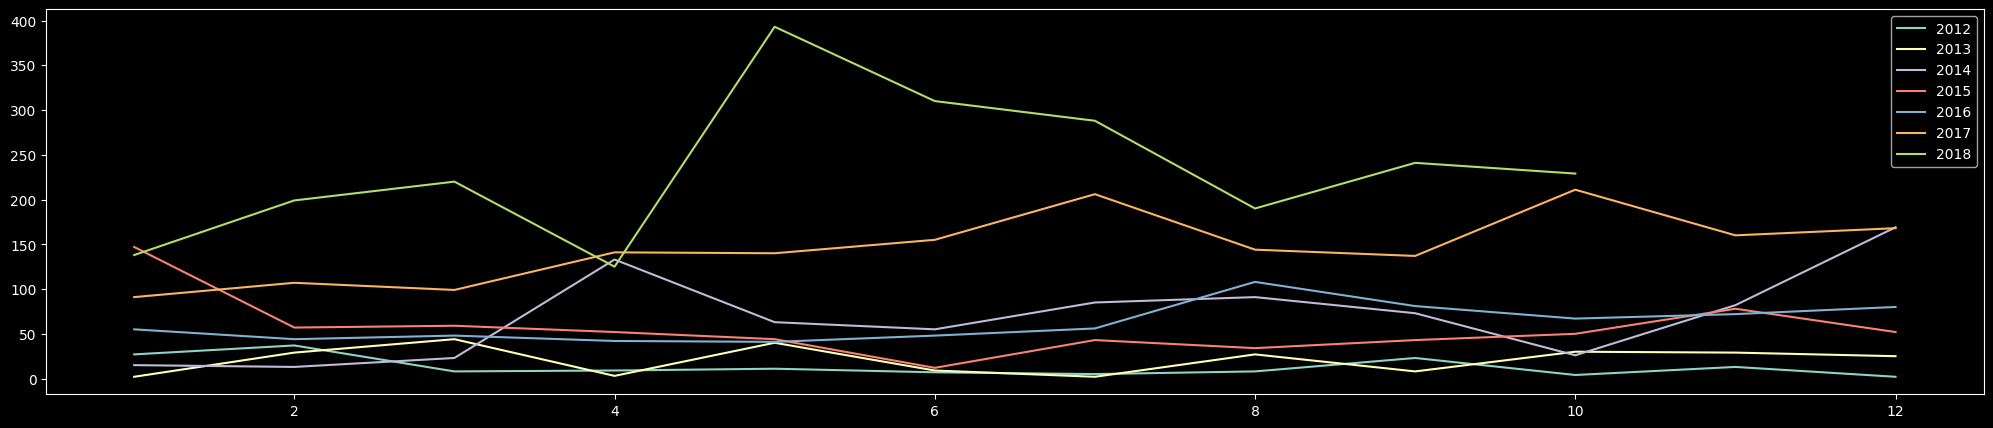

In [ ]:
plt.plot(df_pivot.iloc[0,:], label='2012');
plt.plot(df_pivot.iloc[1,:], label='2013');
plt.plot(df_pivot.iloc[2,:], label='2014');
plt.plot(df_pivot.iloc[3,:], label='2015');
plt.plot(df_pivot.iloc[4,:], label='2016');
plt.plot(df_pivot.iloc[5,:], label='2017');
plt.plot(df_pivot.iloc[6,:], label='2018');
plt.legend();
plt.gcf().set_size_inches(25, 5)

## ** 🥈Session 2 **
** ┗ Time series disassembly **
---


### · Time series decomposition
---

Purpose: Traditional way to understand time series data in detail

* Trend: Trend changing over time
* Seasonality: Repeated Trend
* Residual: Other irregular patterns
  
  

※ Limit of classic decomposition
* Trend-Cycle measurement is disadvantageous for the rapid slope changes in the data.
* Because it is based on the assumption that seasonality is constantly repeated,
*** I can't deal with unusual situations. **
→ X11 decomposition, Seats disassembly, STL disassembly, etc.


---


* Additive decomposition
-Y = s + t + r
``
If the trend is constant, the additional decomposition (additive decomposition)
(※ There is no relationship between Trend and Seasonal.)
``




* Multiplicative decomposition
-Y = s x t x R
``
As the trend changes, multiplication decomposition
(※ There is a relationship with Seasonal depending on the change of Trend.)
``





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    82 non-null     datetime64[ns]
 1   M3      82 non-null     int64         
 2   year    82 non-null     int32         
 3   month   82 non-null     int32         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 2.1 KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,M3,year,month
0,2012-01-01,27,2012,1
1,2012-02-01,37,2012,2
2,2012-03-01,8,2012,3
3,2012-04-01,9,2012,4
4,2012-05-01,11,2012,5


In [ ]:
df=df.set_index('Date')
df.head(5)

,M3,year,month
Date,,,
2012-01-01,27,2012,1
2012-02-01,37,2012,2
2012-03-01,8,2012,3
2012-04-01,9,2012,4
2012-05-01,11,2012,5


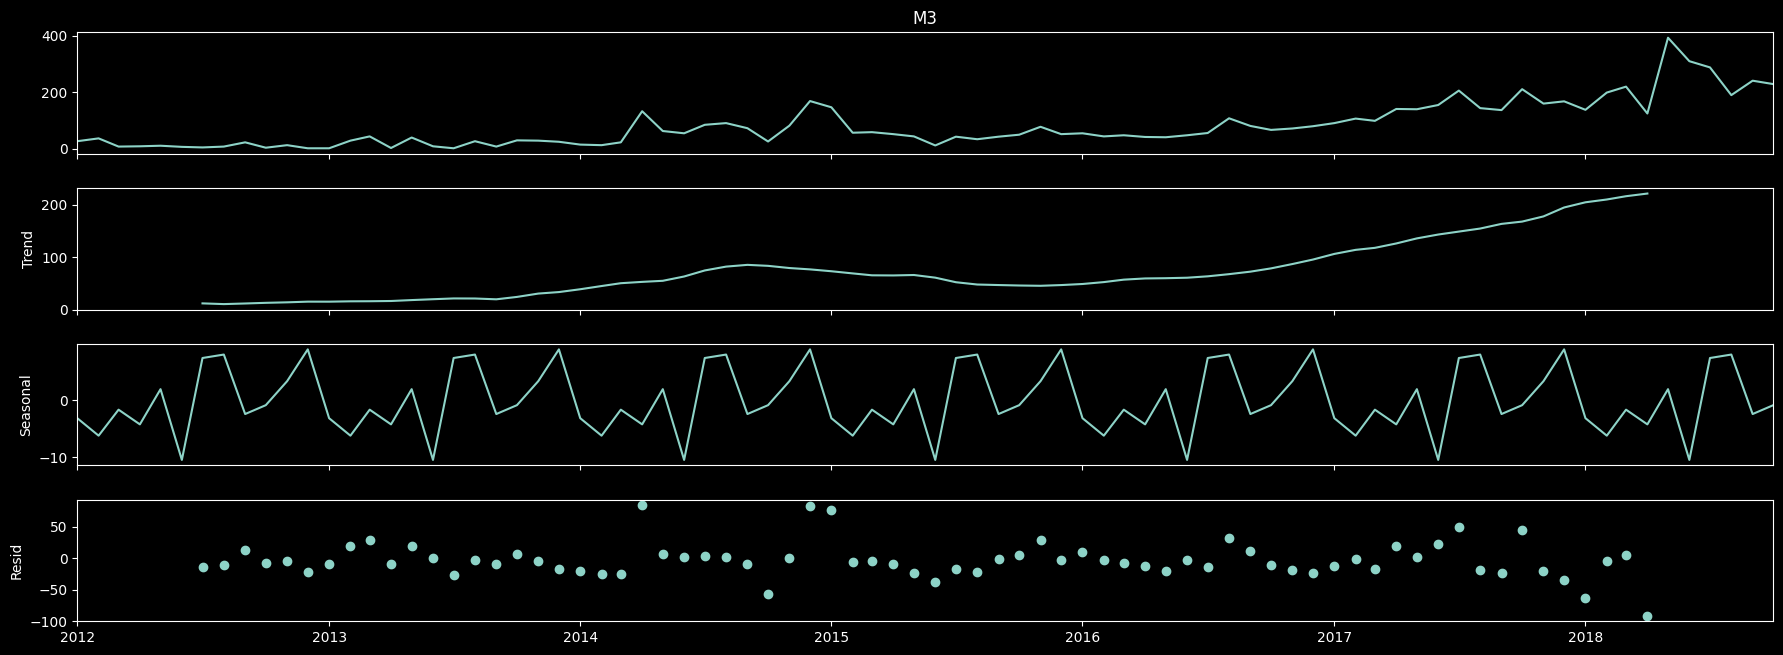

In [ ]:
# ▶ Additive decomposition
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df['M3'],model='addictive')
res.plot()
plt.gcf().set_size_inches(20, 7)
# plt.show()

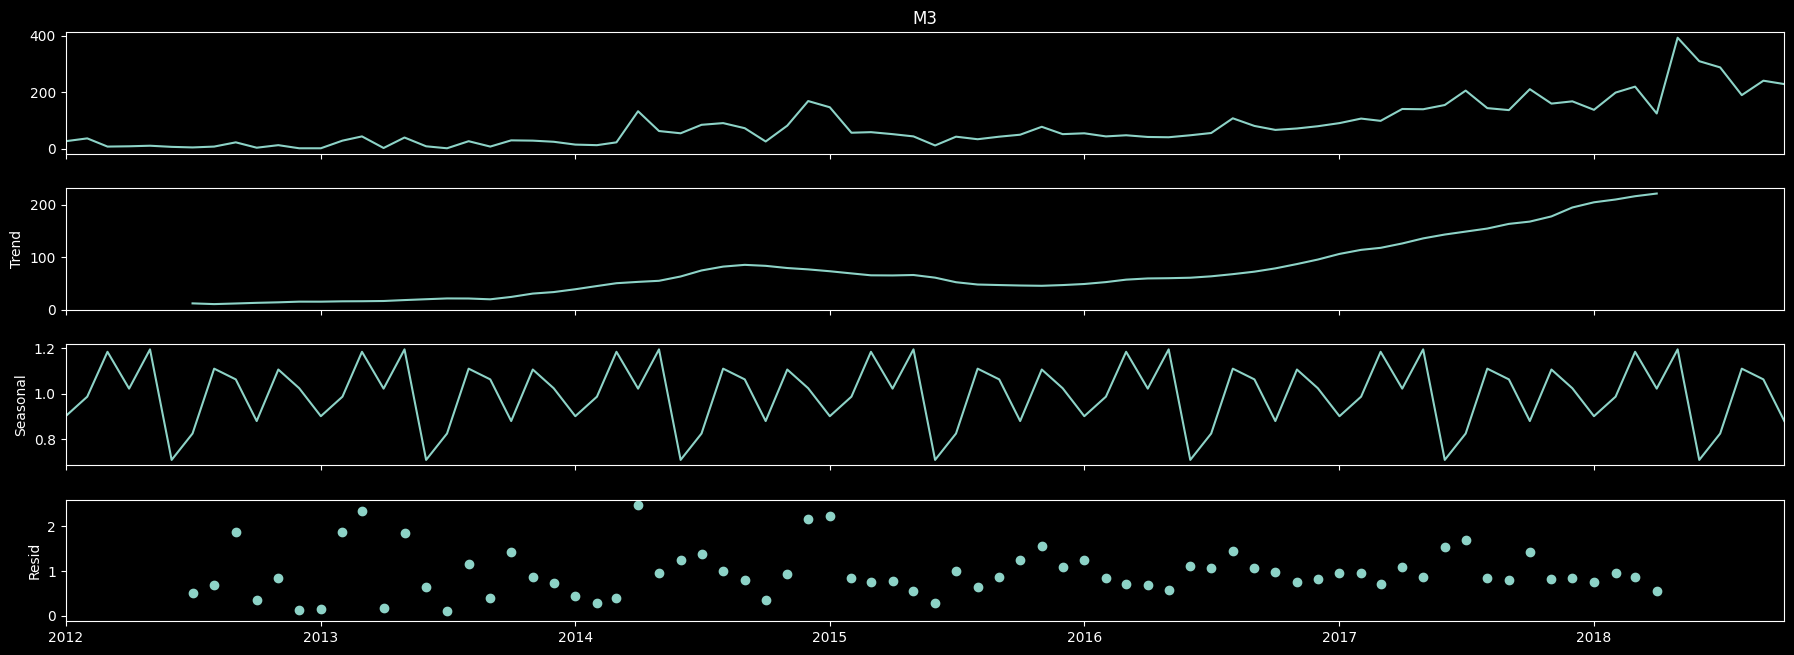

In [ ]:
# ▶ Multiplicative decomposition
# ▶ If you look at the residual graph, you can check the pattern that changes more sensitively than addition decomposition.
res = seasonal_decompose(df['M3'],model='multiplicative')
res.plot()
plt.gcf().set_size_inches(20, 7)
#plt.show()

In [ ]:
# ▶ ATTRIBUTE Use actual data value inquiry available
res.observed

,M3
Date,
2012-01-01,27.0
2012-02-01,37.0
2012-03-01,8.0
2012-04-01,9.0
2012-05-01,11.0
...,...
2018-06-01,310.0
2018-07-01,288.0
2018-08-01,190.0


In [ ]:
# ▶ Some data disappears in front and behind to express Trend (*weakness)
res.trend

,trend
Date,
2012-01-01,NaN
2012-02-01,NaN
2012-03-01,NaN
2012-04-01,NaN
2012-05-01,NaN
...,...
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN


In [ ]:
# ▶ The middle value is filled
res.trend[30:40]

,trend
Date,
2014-07-01,74.500000
2014-08-01,81.833333
2014-09-01,85.166667
2014-10-01,83.291667
2014-11-01,79.125000
2014-12-01,76.541667
2015-01-01,73.000000
2015-02-01,68.875000
2015-03-01,65.250000


In [ ]:
# ▶ Seasonal data check
res.seasonal

,seasonal
Date,
2012-01-01,0.900295
2012-02-01,0.986397
2012-03-01,1.184340
2012-04-01,1.021823
2012-05-01,1.195039
...,...
2018-06-01,0.707353
2018-07-01,0.823849
2018-08-01,1.109924


In [ ]:
# ▶ Check the residual data
res.resid

,resid
Date,
2012-01-01,NaN
2012-02-01,NaN
2012-03-01,NaN
2012-04-01,NaN
2012-05-01,NaN
...,...
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN


## ** 🥇Session 3 **
** ┗ ARIMA used time series prediction **
---
* AR (Autoregression) + MA (Moving Average)


### · Hyper parameter tuning
---


In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
import itertools
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# ▶ Unnecessary column preliminary removal
df = df.drop(['year', 'month'], axis=1)
df.head(5)

,M3
Date,
2012-01-01,27
2012-02-01,37
2012-03-01,8
2012-04-01,9
2012-05-01,11


In [ ]:
# ▶ After creating a parameter model of all combinations, it is grasped as AIC (※ The smaller the AIC, the more likely it is to be the best model)
# ▶ Because it is a one -year data, the cycle is 12
import statsmodels.api as sm
import numpy as np
np.random.seed(1234)
warnings.filterwarnings("ignore") # specify to ignore warning messages


cols = ['param','param_seasonal','aic']
lst = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            lst.append([param, param_seasonal, results.aic])
            df1 = pd.DataFrame(lst, columns=cols)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1000.3292122770475
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:831.2496601807333
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:789.7866810047587
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:664.4255818667397
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:792.2054815357807
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:771.4112962840725
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:675.0642816555652
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:666.4239232273676
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:929.4556694697275
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:782.9348700017828
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:760.547007786278
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:638.0698480454505
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:780.9654398906692
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:752.4203579971826
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:658.8043952235872
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:639.5737300620185
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:845.9343856515544
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:730.5310504703781
ARIMA(0, 1

In [ ]:
df1

,param,param_seasonal,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",1000.329212
1,"(0, 0, 0)","(0, 0, 1, 12)",831.249660
2,"(0, 0, 0)","(0, 1, 0, 12)",789.786681
3,"(0, 0, 0)","(0, 1, 1, 12)",664.425582
4,"(0, 0, 0)","(1, 0, 0, 12)",792.205482
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",600.401288
60,"(1, 1, 1)","(1, 0, 0, 12)",717.133985
61,"(1, 1, 1)","(1, 0, 1, 12)",709.600925
62,"(1, 1, 1)","(1, 1, 0, 12)",614.539441


In [ ]:
# ▶ A combination of parameter with minimal AIC
aic_min=df1['aic'].min()
optimal_para=df1.loc[df1['aic']==aic_min]
optimal_para

,param,param_seasonal,aic
27,"(0, 1, 1)","(0, 1, 1, 12)",599.147141


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ BEST Score Standard Model Learning
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6590      0.116     -5.692      0.000      -0.886      -0.432
ma.S.L12      -0.7417      0.367     -2.023      0.043      -1.460      -0.023
sigma2      2630.1017    310.260      8.477      0.000    2022.002    3238.201


In [ ]:
# ▶ Ljung-Box: Whether the residue follows White Noise (※ The time series model is well suitable and the remaining residue is no longer self-correlation)
# ▶ JARQUE -BRA: Is the distribution of residuals following Normal Distributison
# ▶ Hereroskeddasticity: Is the dispersion of the residuals by time zone
# ▶ Since all are 0.05 or more, it follows white noise, Normal Distribution, and distributed is constant.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 M3   No. Observations:                   82
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -296.574
Date:                            Sun, 30 Mar 2025   AIC                            599.147
Time:                                    14:15:20   BIC                            605.169
Sample:                                01-01-2012   HQIC                           601.476
                                     - 10-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6590      0.116     -5.692      0.000      -0.886      -0.432
ma.S.L12      -0.7417      0.367     -2.023      0.043      -1.460      -0.023
sigma2      2630.1017    310.260      8.477      0.000    2022.002    3238.201
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                52.36
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                             1.28
Prob(H) (two-sided):                  0.13   Kurtosis:                         7.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

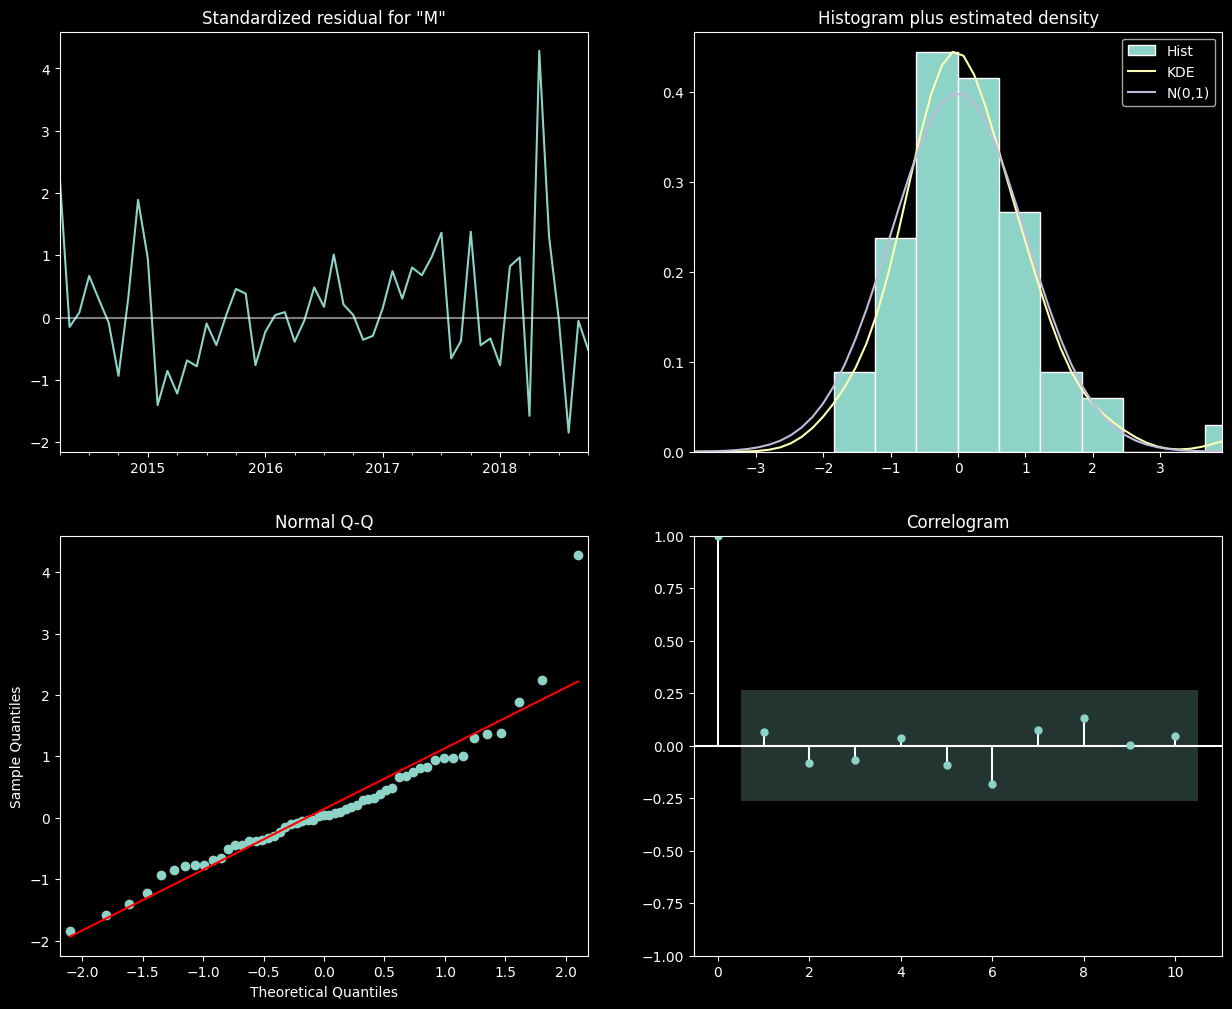

In [ ]:
# ▶ The resulting model consistency confirmation process (※ determine whether the Arima model can be used, whether the residuals follow normal)
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# ▶ (1) Standardized Residual: The closer the residuals are to white noise
# ▶ (2) Histogram Plus Estimated Density: The distribution of the residue follows the normal distribution, the histogram of the residue and the KDE Plot, and the N (0,1) regular distribution and comparison
# ▶ (3) Q-Q Plot: Plot (x-axis: theoretical sample distribution (normal distribution), Y-axis: DF ['m3'))
# ▶ (4) Correlogram: ACF for the residue, a plot to represent predicted self -correlation, or in green box, it can be judged that there is no self -correlation.

# ▶ A little regular, after prediction, if it does not fit well,


### · Forecast and Plotting
---


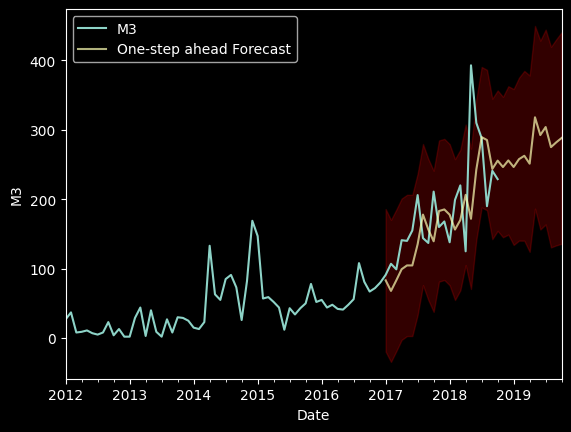

In [ ]:
#################################################################################################################
#--------------- start=pd.to_datetime(        ) ----------------------------------------------------------------#
# --------------- 예측을 시작 및 종료하고 싶은 날짜를 빈칸에 입력함 ---------------------------------------------#
#--------------- ex) 2017-01-01 --------------------------------------------------------------------------------#
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2019-10-01'), dynamic=False)
#################################################################################################################

pred_ci = pred.conf_int()
# I will draw the graph from 2015.
ax = df['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('M3')
plt.legend()

plt.rcParams["figure.figsize"] = (30, 5)
plt.show()

In [ ]:
df.index.max()

Timestamp('2018-10-01 00:00:00')

In [ ]:
y_forecasted = pred.predicted_mean
########################################
# Enter the prediction start date selected above #
y_truth = df['2017-01-01':]
########################################

# Compute the mean square error
mse = ((y_forecasted - y_truth['M3']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

mae = (abs(y_forecasted - y_truth['M3'])).mean()
print('The MAE is {}'.format(round(mae, 2)))

The Mean Squared Error of our forecasts is 4345.03
The MAE is 47.93


In [ ]:
cols = ['y_truth','y_forecasted']
dat = []
result=pd.DataFrame(dat,columns=cols)
########################################
# Enter the prediction start date selected above #
y_real=df['2017-01-01':]
########################################

result['y_forecasted']=y_forecasted
result['y_truth']=y_real['M3']
result['diff'] = result['y_truth'] - result['y_forecasted']
result

,y_truth,y_forecasted,diff
2017-01-01,91.0,83.175757,7.824243
2017-02-01,107.0,67.938830,39.061170
2017-03-01,99.0,83.200814,15.799186
2017-04-01,141.0,99.200742,41.799258
2017-05-01,140.0,104.656336,35.343664
2017-06-01,155.0,104.631222,50.368778
2017-07-01,206.0,135.285839,70.714161
2017-08-01,144.0,177.907443,-33.907443
2017-09-01,137.0,156.424170,-19.424170
2017-10-01,211.0,139.425423,71.574577
